# Homework 10
## Revisiting the Iris Data Set Using Classification

In [11]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from numpy import linalg
import pandas as pd
import numpy as np
import scipy
import requests
from pandas_profiling import ProfileReport
import ipywidgets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import plot_tree
from sklearn.pipeline import Pipeline



In [2]:
#Import dataset

irisdf = datasets.load_iris(as_frame=True)
iris = irisdf.data
iris['species'] = irisdf.target.map(lambda x: irisdf.target_names[x])
# drop cm from column name
iris.rename(columns={'sepal width (cm)': 'sepal width', 'sepal length (cm)':'sepal length', 
                       'petal length (cm)':'petal length', 'petal width (cm)': 'petal width'}, inplace=True)
species_list = ['setosa', 'versicolor', 'virginica']
iris.sample(10)


,sepal length,sepal width,petal length,petal width,species
79,5.7,2.6,3.5,1.0,versicolor
148,6.2,3.4,5.4,2.3,virginica
120,6.9,3.2,5.7,2.3,virginica
109,7.2,3.6,6.1,2.5,virginica
51,6.4,3.2,4.5,1.5,versicolor
107,7.3,2.9,6.3,1.8,virginica
48,5.3,3.7,1.5,0.2,setosa
16,5.4,3.9,1.3,0.4,setosa
84,5.4,3.0,4.5,1.5,versicolor
46,5.1,3.8,1.6,0.2,setosa


In [3]:
dense = iris.iloc[:, -1].to_numpy()

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


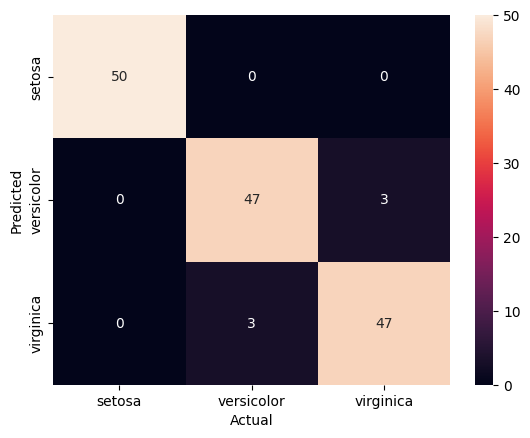

Accuracy:  0.96


In [26]:
model = GaussianNB()
model = model.fit(iris.iloc[:, :-1], dense)
y_pred = model.predict(iris.iloc[:, :-1])
cf = confusion_matrix(iris.iloc[:, -1], y_pred)
names = model.classes_
print(cf)
sns.heatmap(cf, annot=True, fmt='g', yticklabels=names, xticklabels=names)
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()
print("Accuracy: ", accuracy_score(iris.iloc[:, -1], y_pred))

DecisionTreeClassifier
[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


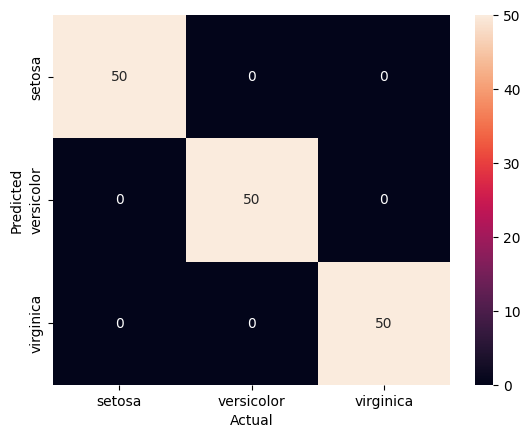

Accuracy:  1.0


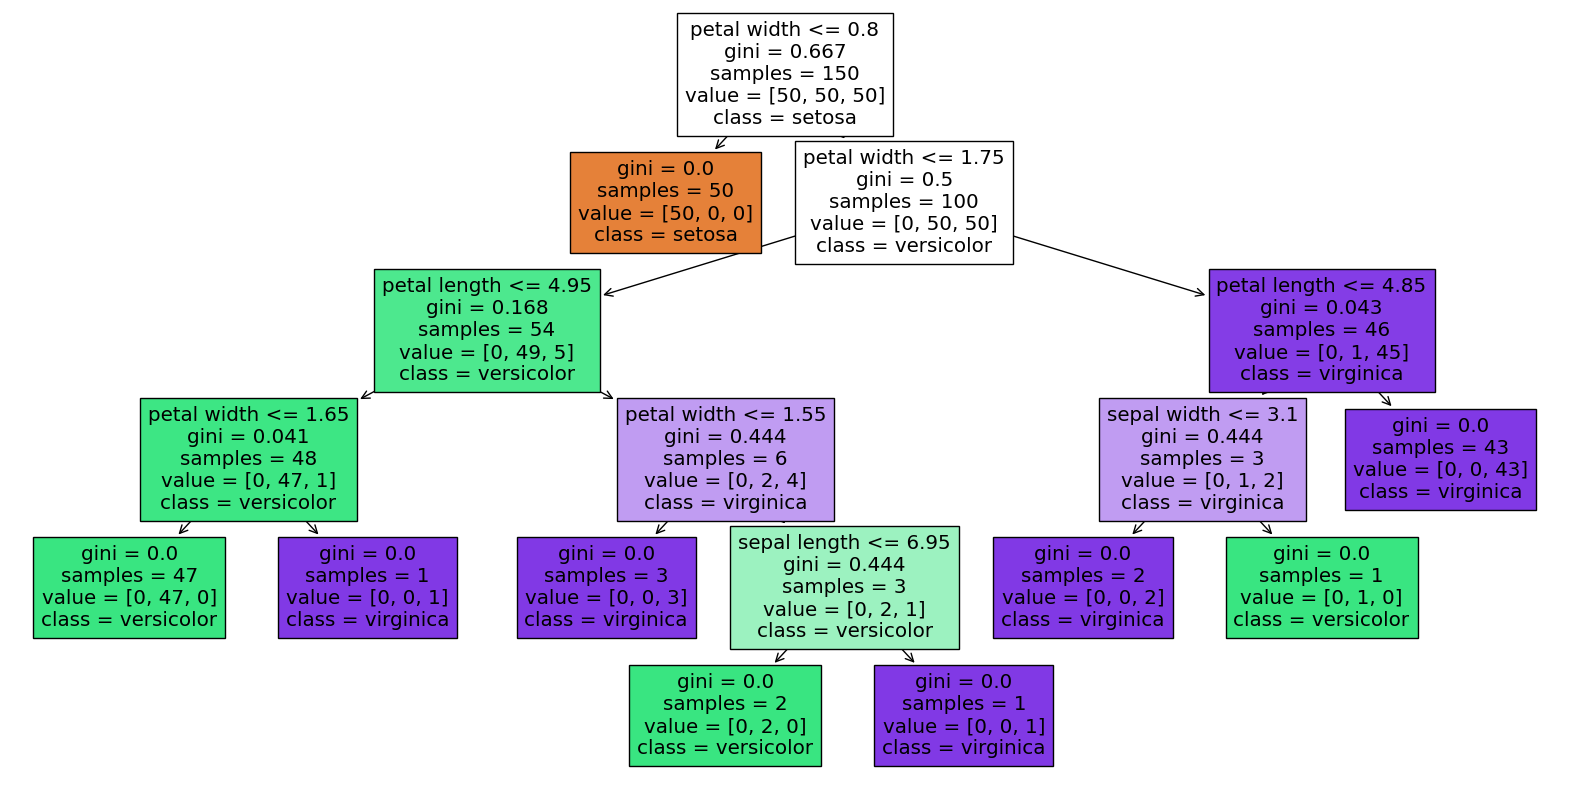

RandomForestClassifier
[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


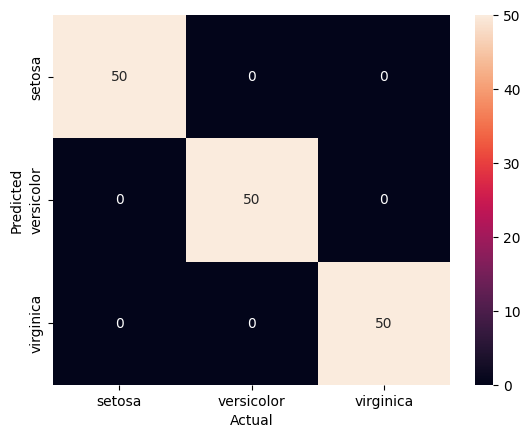

Accuracy:  1.0
SVC
[[50  0  0]
 [ 0 48  2]
 [ 0  2 48]]


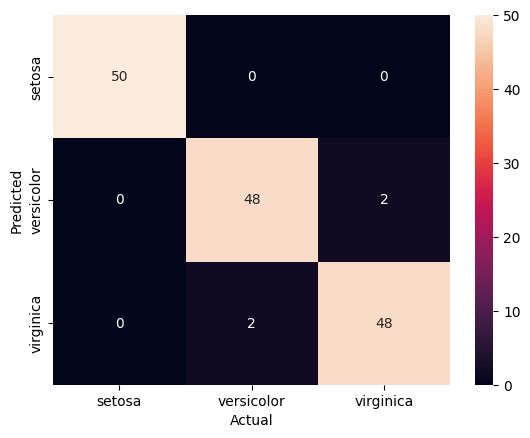

Accuracy:  0.9733333333333334


In [25]:
for model in [DecisionTreeClassifier(), RandomForestClassifier(), SVC()]:
    #pipe = Pipeline([('ohe', OneHotEncoder()), ('mod', model)])
    model = model.fit(iris.iloc[:, :-1], iris.iloc[:, -1])
    y_pred = model.predict(iris.iloc[:, :-1])
    print(type(model).__name__)
    cf = confusion_matrix(iris.iloc[:, -1], y_pred)
    names = model.classes_
    print(cf)
    sns.heatmap(cf, annot=True, fmt='g', yticklabels=names, xticklabels=names)
    plt.ylabel("Predicted")
    plt.xlabel("Actual")
    plt.show()
    print("Accuracy: ", accuracy_score(iris.iloc[:, -1], y_pred))
    if type(model).__name__ == "DecisionTreeClassifier":
        feat_names = model.feature_names_in_
        plt.figure(figsize=(20,10))
        plot_tree(model, feature_names=feat_names, filled=True, class_names=names)
        plt.show()

# Conclusion

Random Forest and Decsion Trees have perfect predictors. SVC is 97% and Gaussian Baive Bayes is 96% accurate.

Techniques that work the best -  
* Naïve Bayes
* Random Forest
* Decision Trees
* Support Vector Machines

Techniques that work the least -  
* Agglomerative Clustering
* Basic K-means
* Hierarchical
* PCA
* Spectral Clustering